<a href="https://colab.research.google.com/github/priya1804/THE-PIMA-INDIAN-DIABETES-DATABASE/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf


Dataset head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Dataset Shape: (768, 9)
Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369

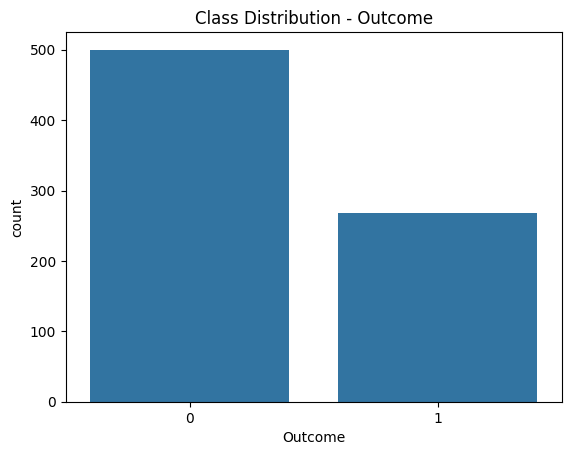

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [2]:
# Load the Pima Indian Diabetes Dataset
# Load the Pima Indian Diabetes Dataset
dataset = pd.read_csv("diabetes.csv")

# Explore the dataset
print("Dataset head:\n", dataset.head())
print("Dataset Shape:", dataset.shape)
print("Summary Statistics:\n", dataset.describe())

# Visualize class distribution (Outcome)
sns.countplot(x="Outcome", data=dataset)
plt.title("Class Distribution - Outcome")
plt.show()

# Checking for missing values
print("Missing Values:\n", dataset.isnull().sum())


In [3]:
# Handle missing values: Replace zeros with NaN, then fill with the median
dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
dataset.fillna(dataset.median(), inplace=True)

# Feature scaling (Standardization)
X = dataset.drop("Outcome", axis=1)  # Features
y = dataset["Outcome"]  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM (3D shape: [samples, time_steps, features])
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# Create the LSTM model
model = Sequential()

# LSTM Layer
model.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Dense Layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5734 - loss: 0.6835 - val_accuracy: 0.7468 - val_loss: 0.6539
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7253 - loss: 0.6440 - val_accuracy: 0.7468 - val_loss: 0.6102
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7628 - loss: 0.5914 - val_accuracy: 0.7403 - val_loss: 0.5604
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.5266 - val_accuracy: 0.7273 - val_loss: 0.5210
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7776 - loss: 0.4927 - val_accuracy: 0.7338 - val_loss: 0.5033
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7683 - loss: 0.4806 - val_accuracy: 0.7273 - val_loss: 0.4945
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7696 - loss: 0.4715 - val_accuracy: 0.7403 - val_loss: 0.4879
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7951 - loss: 0.4293 - val_accuracy: 0.7403 - val_loss

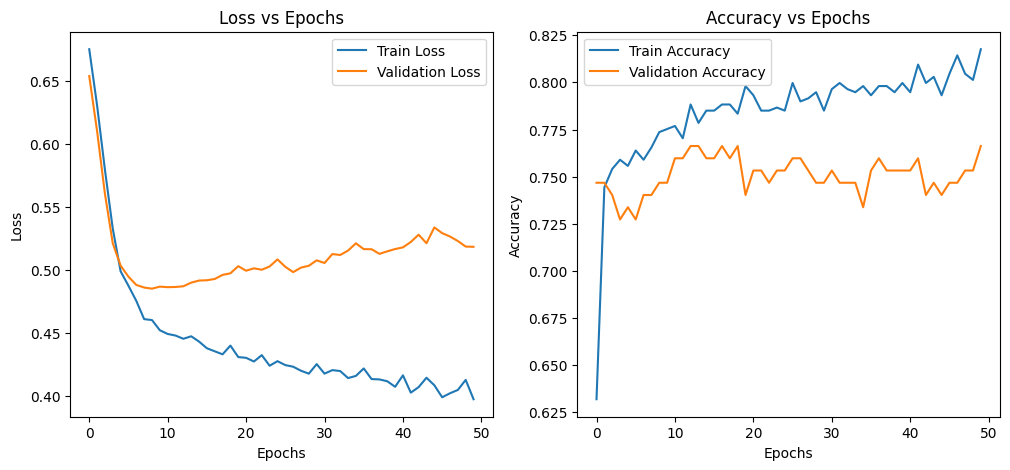

In [6]:
# Plotting the training & validation loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [7]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Thresholding at 0.5 to get binary output

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LSTM Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step
LSTM Model Accuracy: 76.62%
Confusion Matrix:
 [[80 19]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

